In [1]:
!pip install ultralytics

In [2]:
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import Image

Ultralytics 8.3.157 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.9/112.6 GB disk)


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="kFrR4iIfLJTO0e7FJphL")
project = rf.workspace("food-dataset-yyrkb").project("food-data-otkj3")
version = project.version(6)
dataset = version.download("yolov8-obb")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Food-Data-6 in yolov8-obb:: 100%|██████████| 452/452 [00:00<00:00, 5939.51it/s]


In [4]:
dataset.location

'/content/Food-Data-6'

In [5]:
!yolo task =detect mode = train data = {dataset.location}/data.yaml model="yolo11n.pt" epochs = 100 imgsz = 640

Ultralytics 8.3.157 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Food-Data-6/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretra

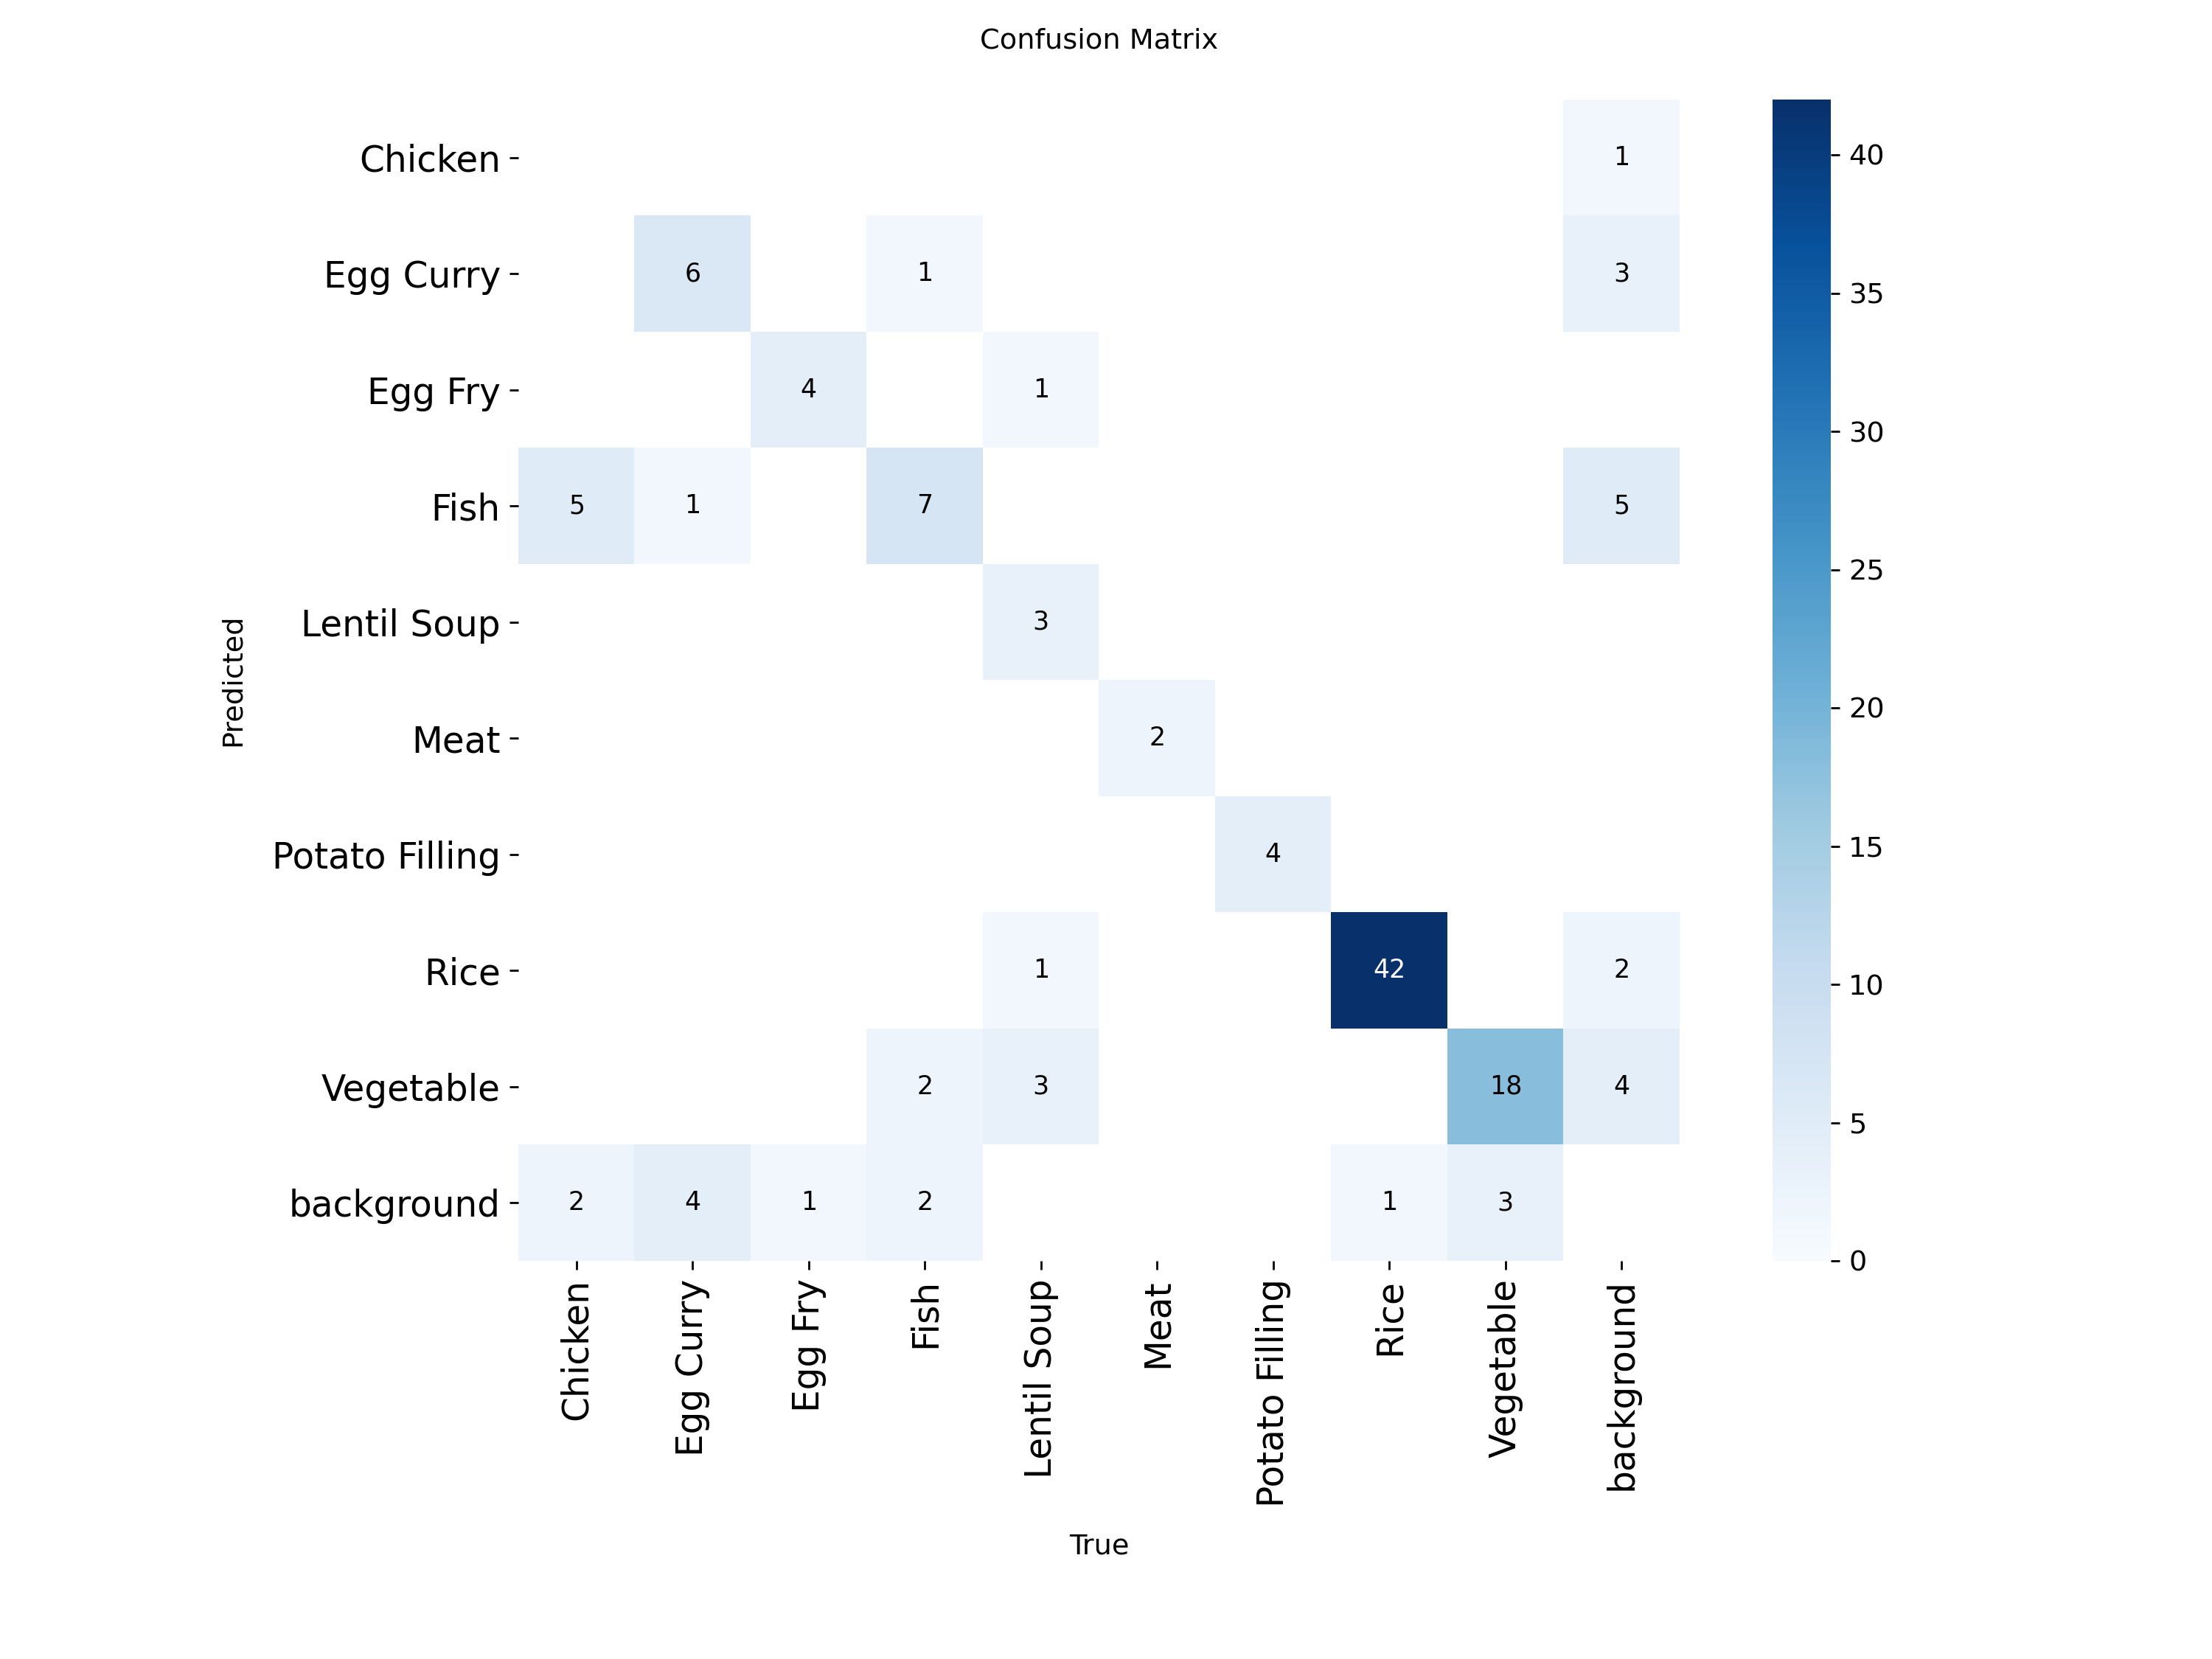

In [14]:
Image("/content/runs/detect/train2/confusion_matrix.png" , width=600)


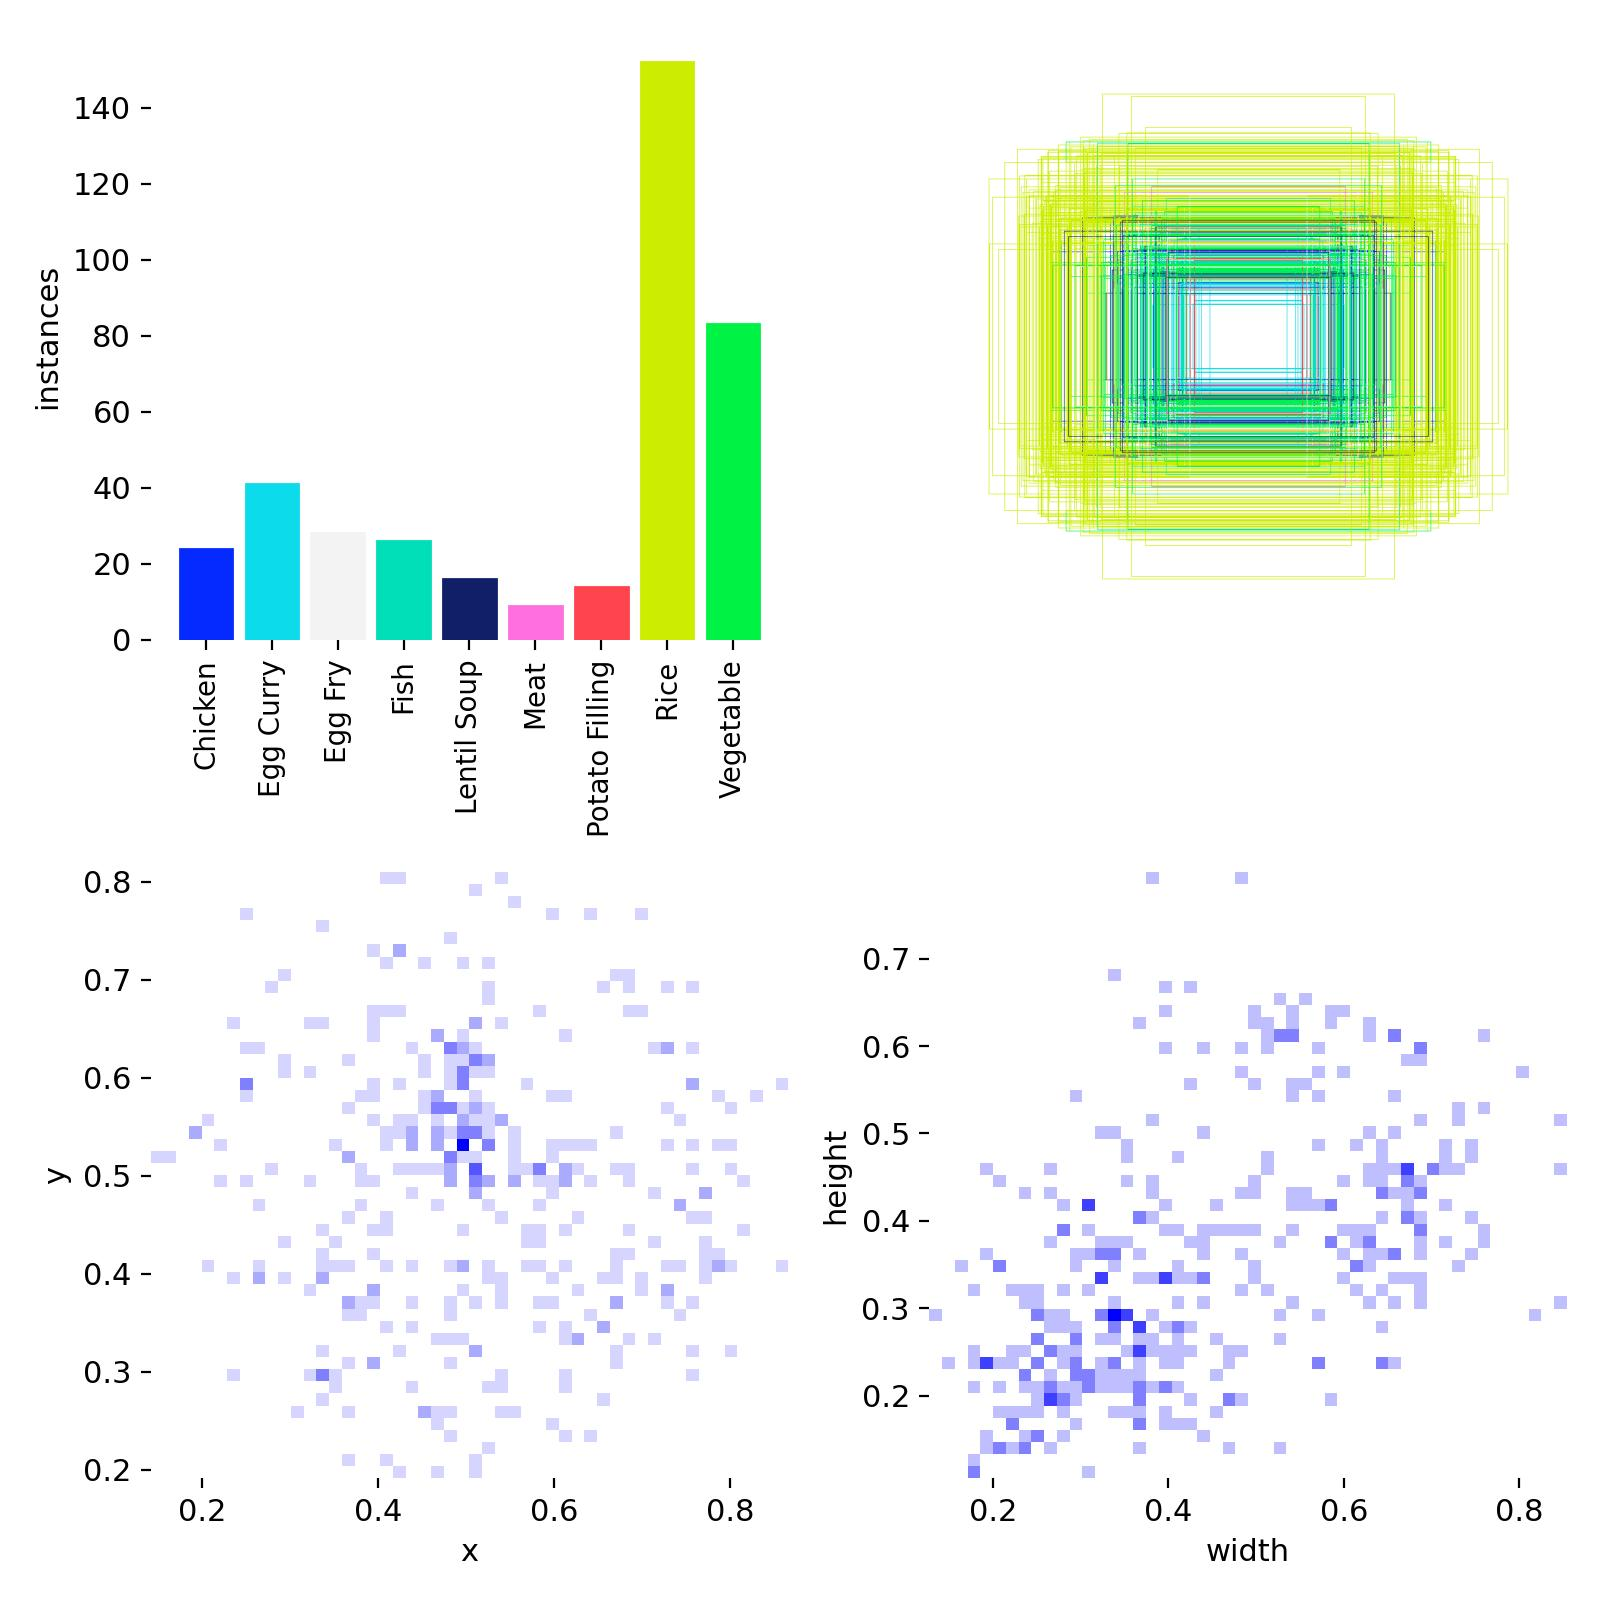

In [15]:
Image("/content/runs/detect/train2/labels.jpg" , width=600)

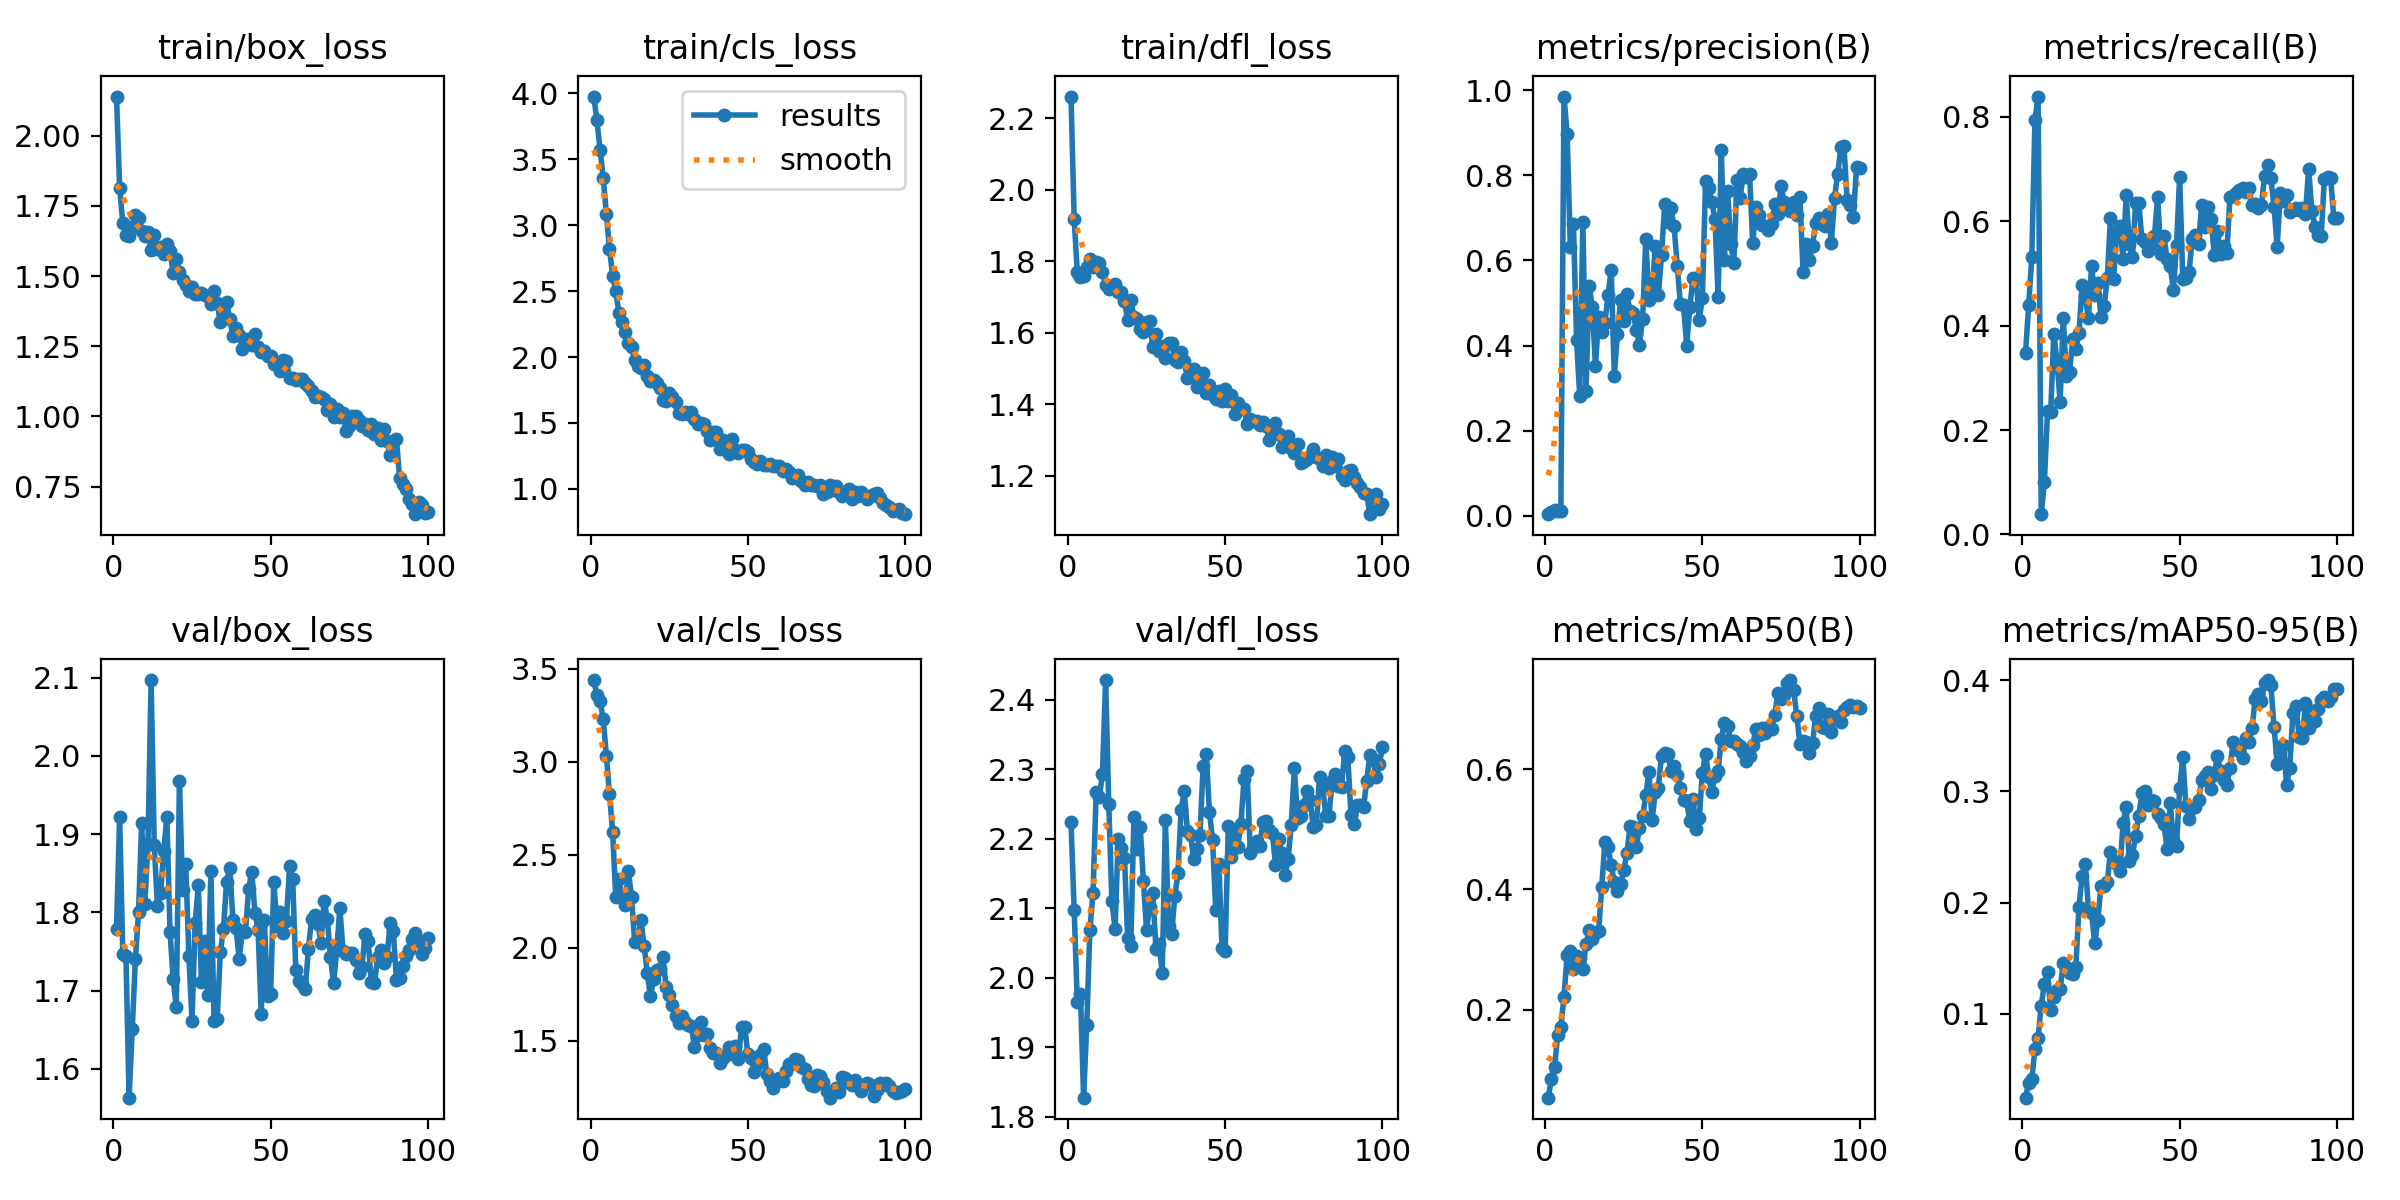

In [16]:
Image("/content/runs/detect/train2/results.png" , width=600)


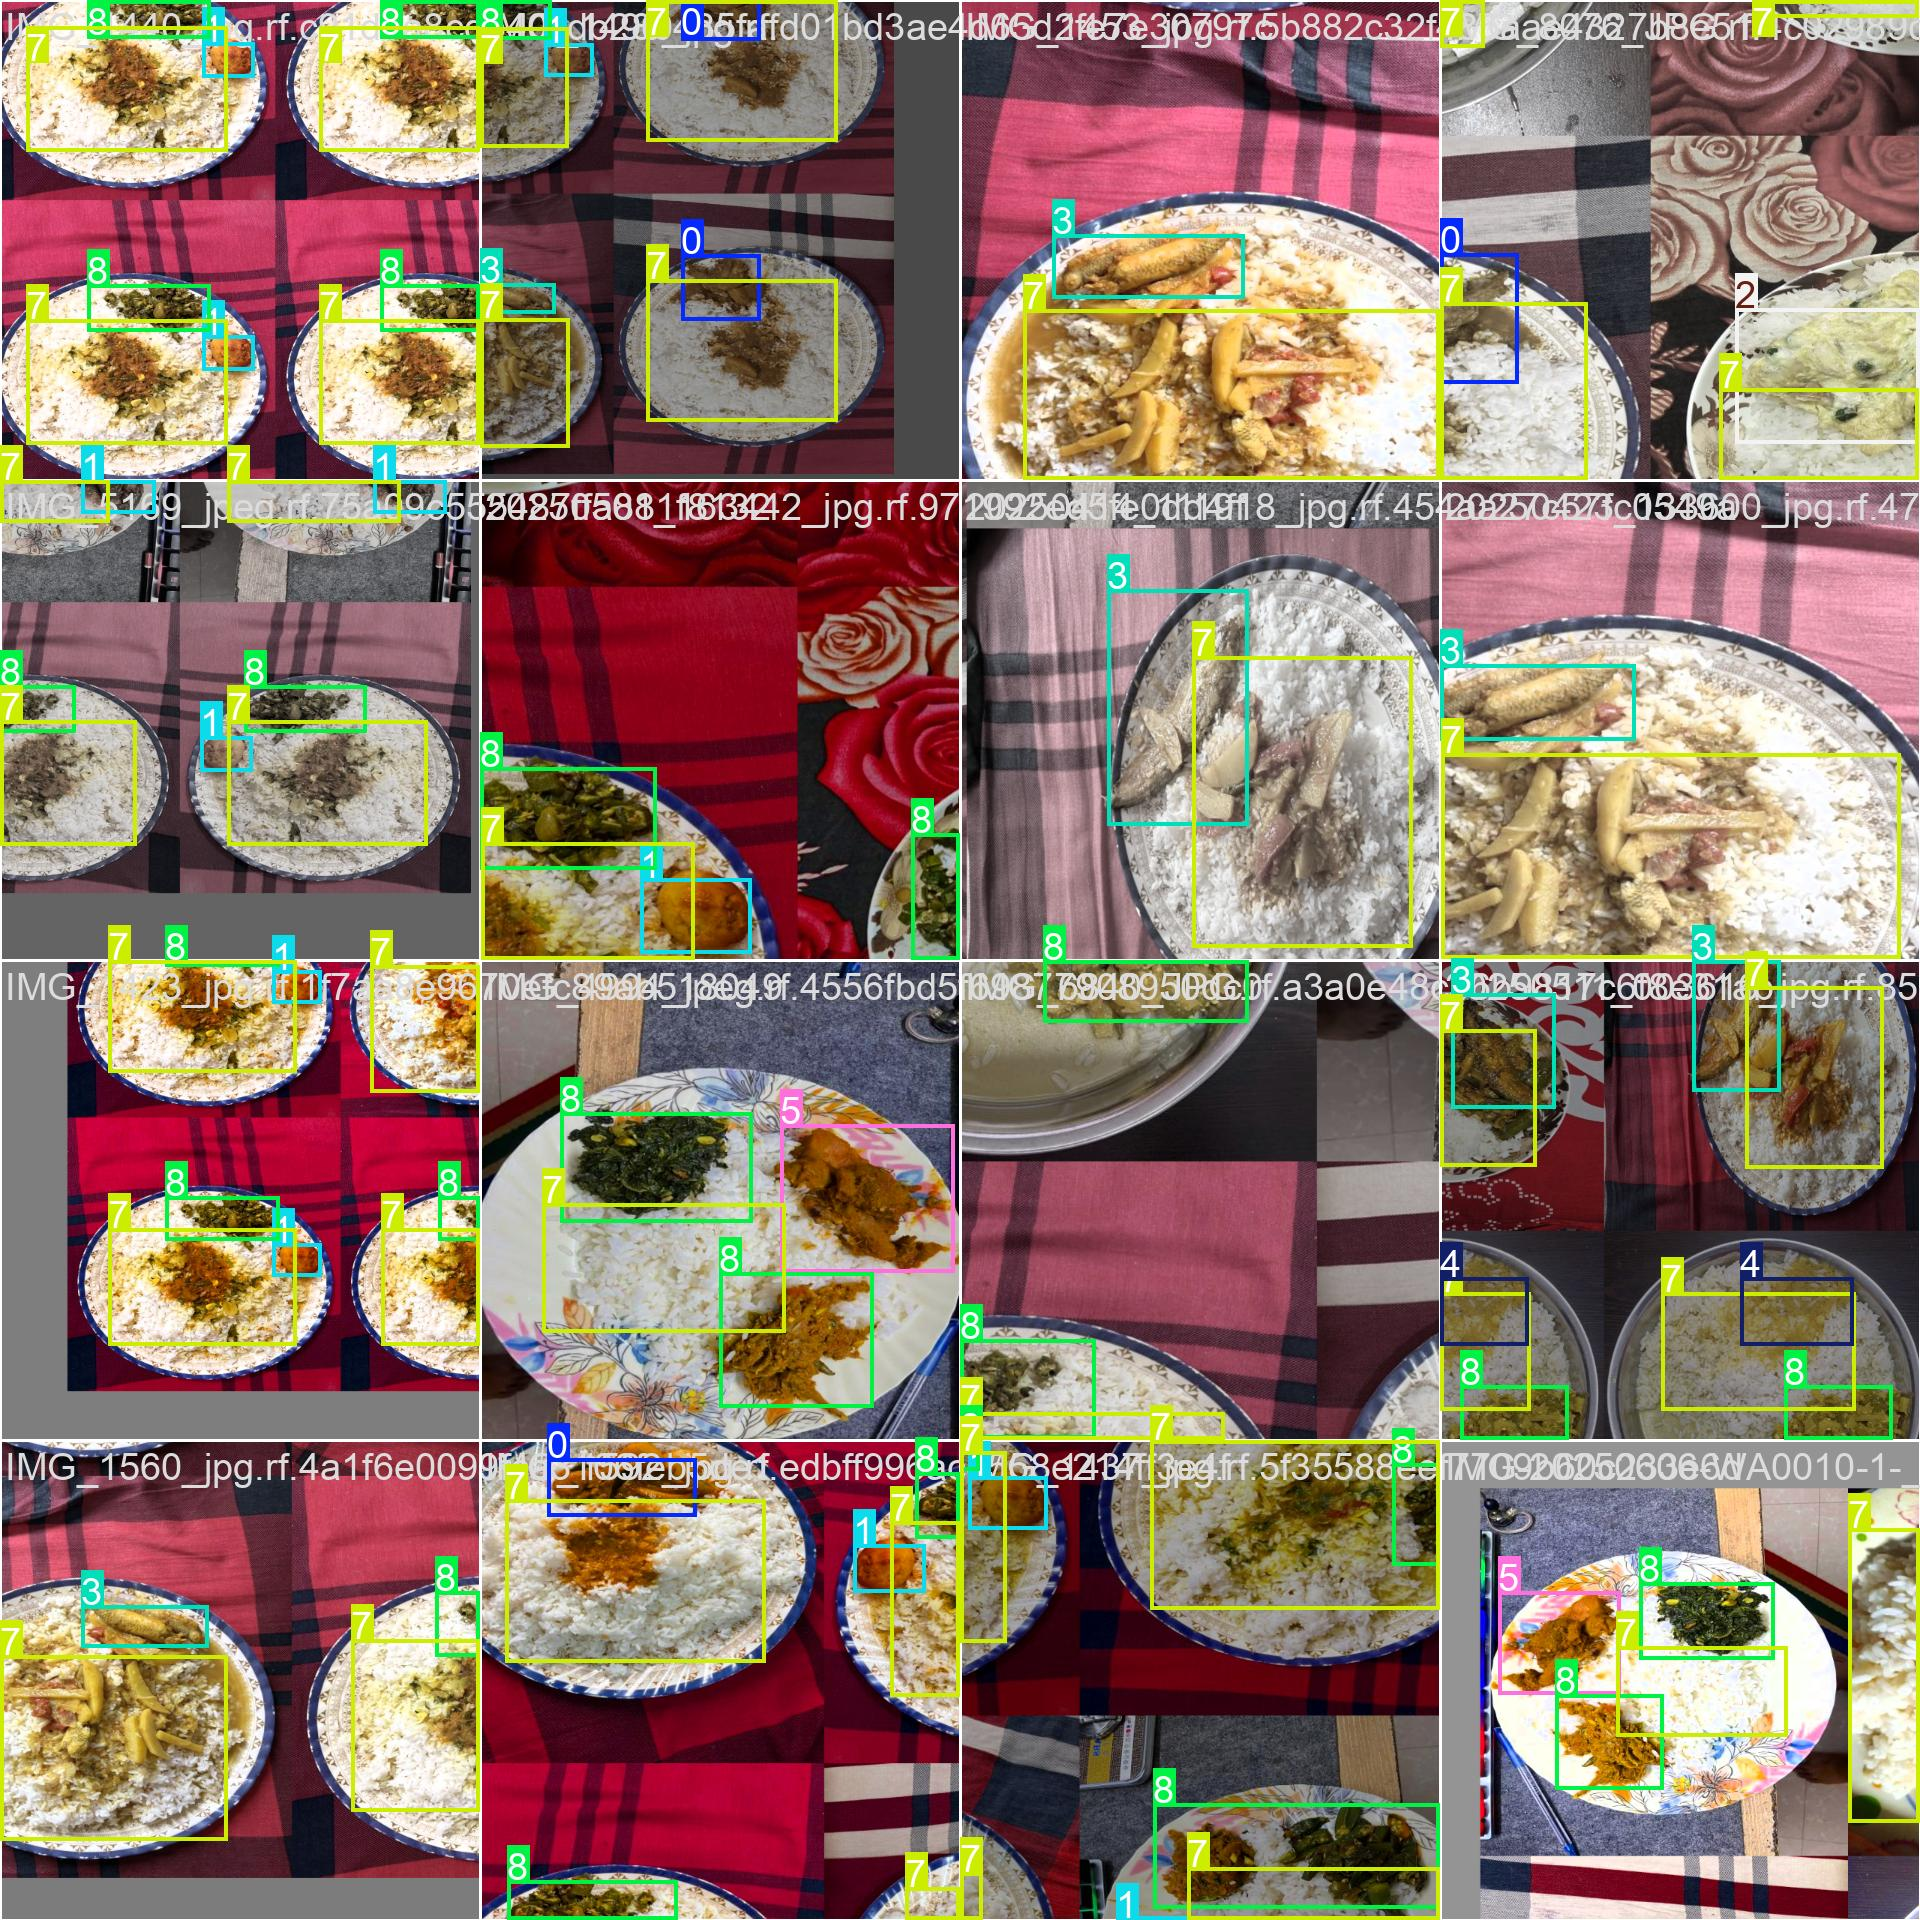

In [17]:
Image("/content/runs/detect/train2/train_batch0.jpg" , width=600)


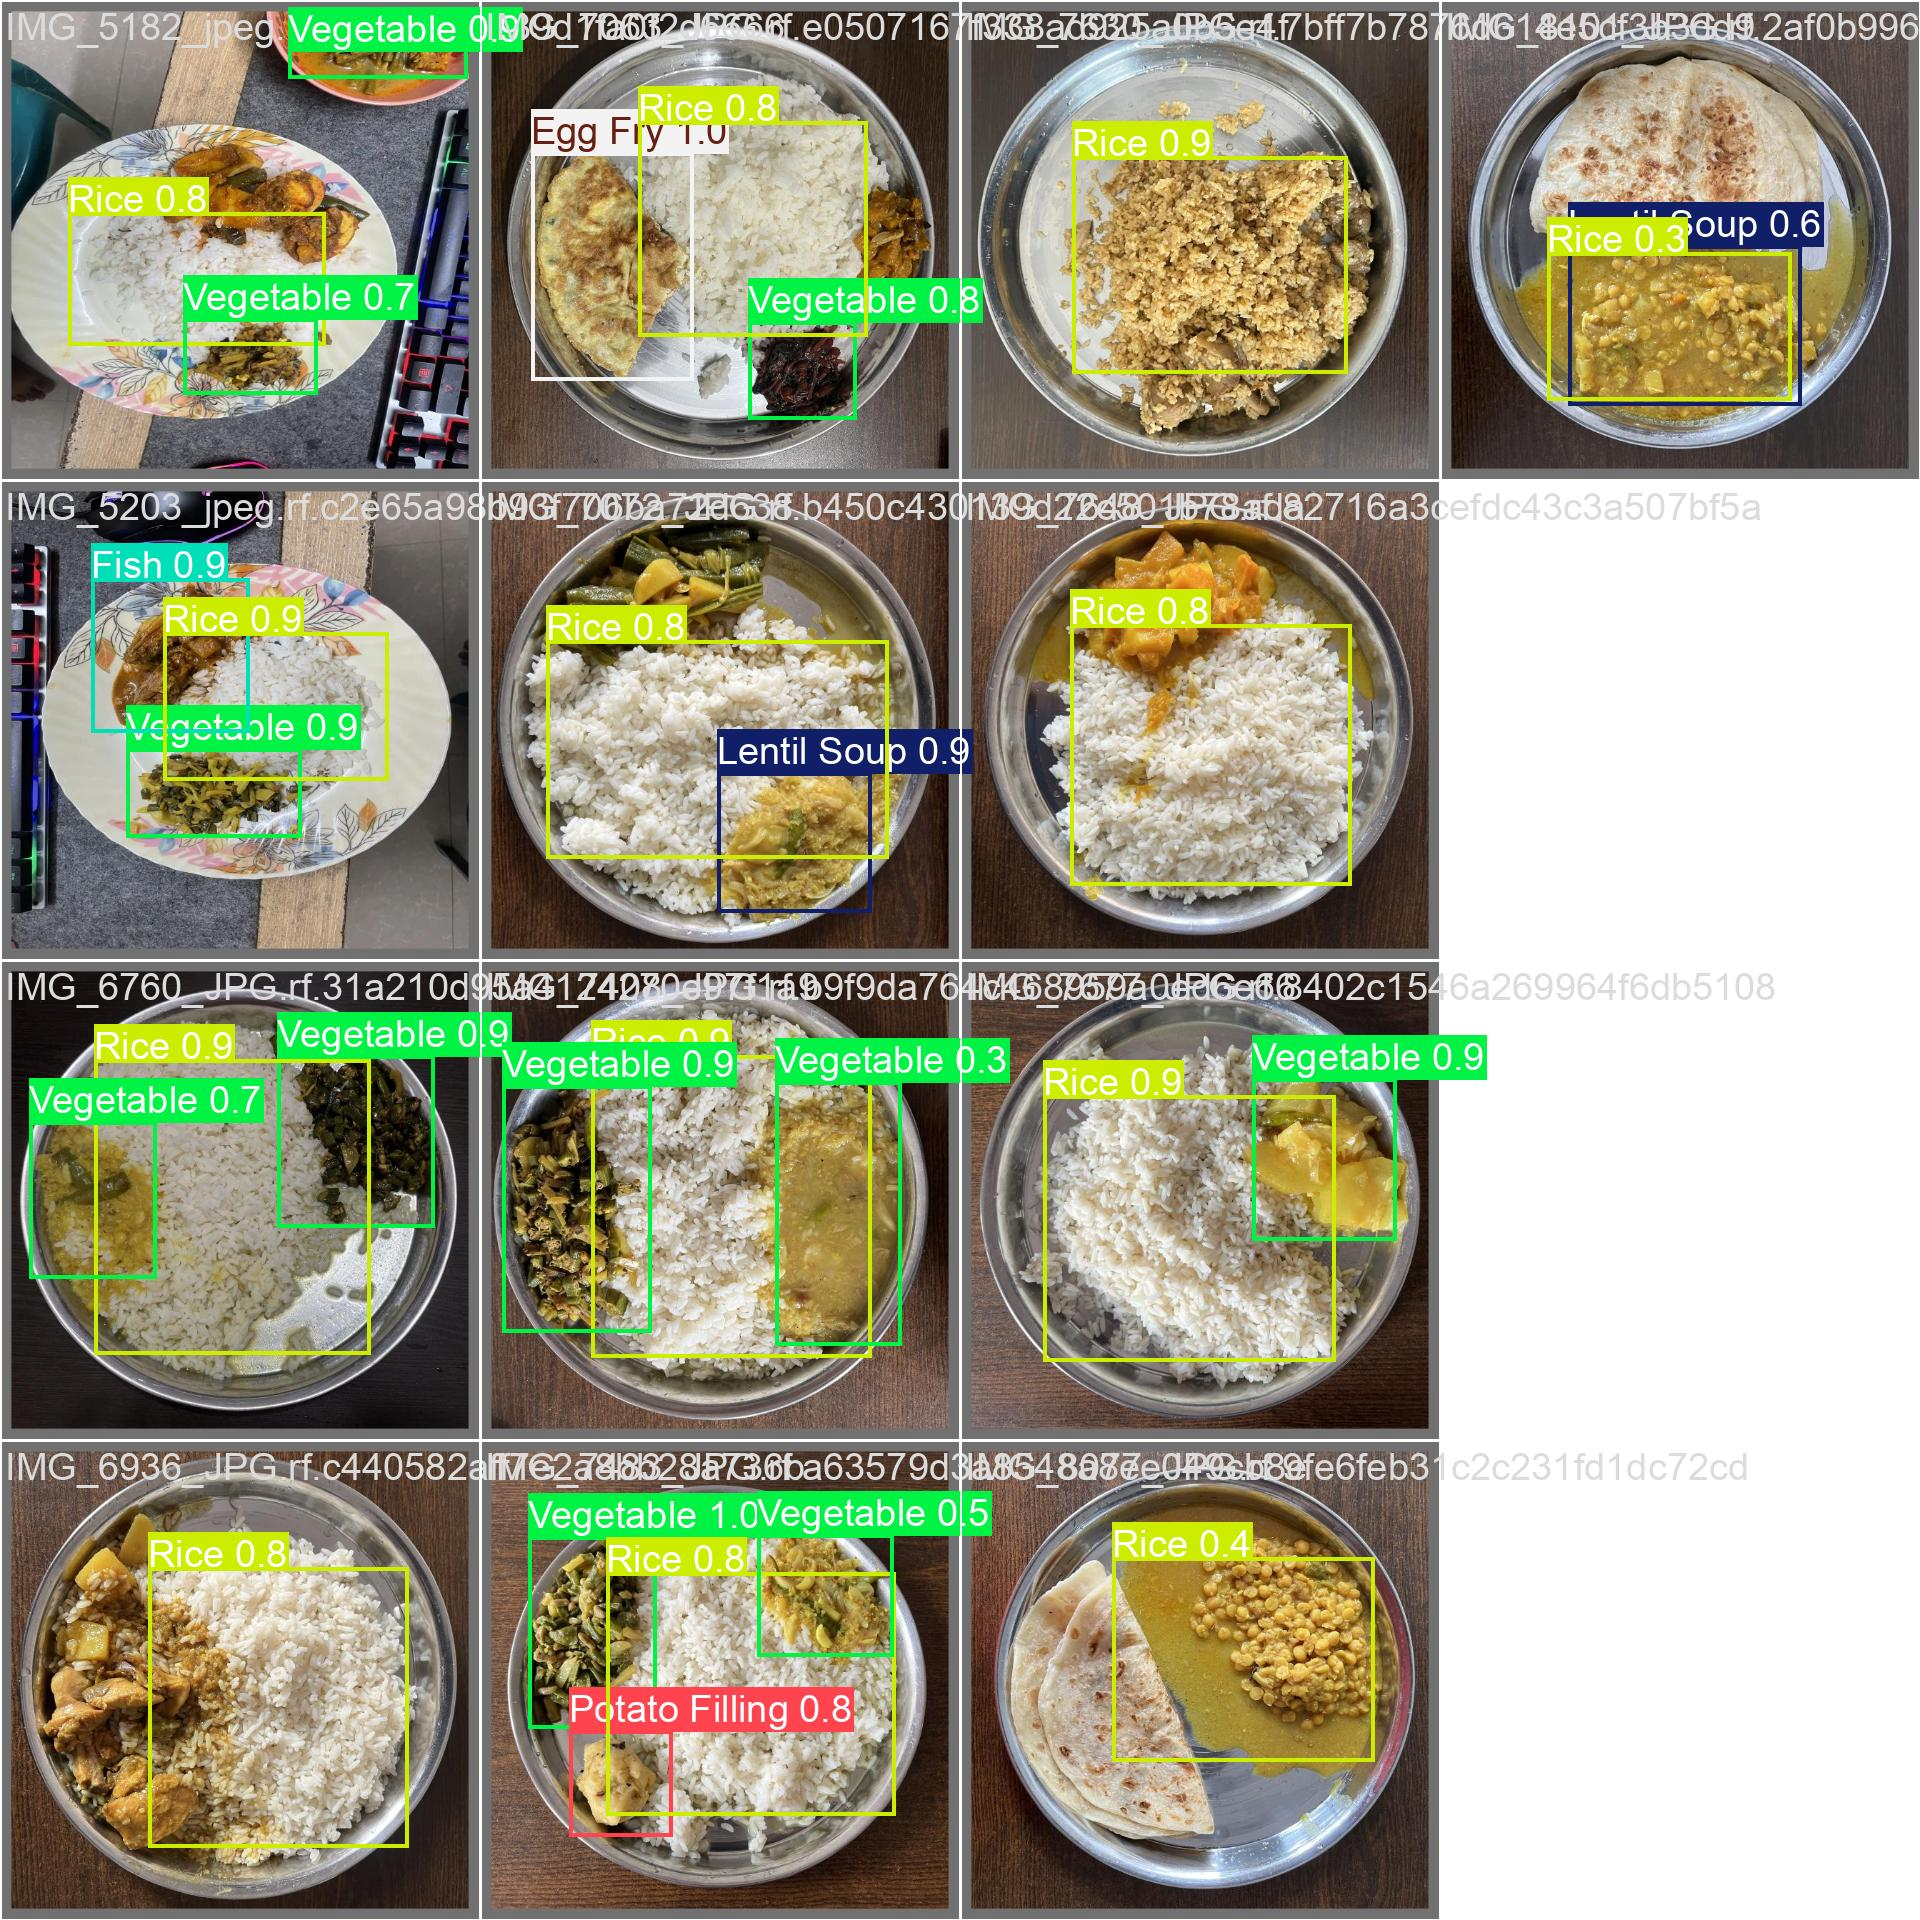

In [18]:
Image("/content/runs/detect/train2/val_batch1_pred.jpg" , width=600)


In [19]:
!yolo task=detect mode=val model= "/content/runs/detect/train2/weights/best.pt" data={dataset.location}/data.yaml


Ultralytics 8.3.157 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1638.0±965.0 MB/s, size: 85.9 KB)
val: Scanning /content/Food-Data-6/valid/labels.cache... 45 images, 0 backgrounds, 0 corrupt: 100% 45/45 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:01<00:00,  1.76it/s]
                   all         45        119      0.659      0.696      0.677      0.339
               Chicken          9          9      0.693      0.506      0.629      0.427
             Egg Curry          9          9      0.532      0.667       0.68       0.29
               Egg Fry          5          5      0.968          1      0.995      0.487
                  Fish         12         13      0.408      0.769      0.713      0.334
           Lentil Soup          9          9      0.655    

In [20]:
!yolo task=detect mode=predict model= "/content/runs/detect/train2/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.157 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs

image 1/21 /content/Food-Data-6/test/images/20250414_222847_jpg.rf.cfe223bf742542bb841521437a00d8b3.jpg: 640x480 1 Chicken, 1 Rice, 1 Vegetable, 55.5ms
image 2/21 /content/Food-Data-6/test/images/20250506_012745_jpg.rf.6b9c3051e8190ad2e7446049376b4a7b.jpg: 640x480 1 Rice, 9.7ms
image 3/21 /content/Food-Data-6/test/images/IMG-20250606-WA0003_jpg.rf.9e460568df3e64bf2c958b904297fab5.jpg: 544x640 1 Egg Curry, 1 Rice, 46.2ms
image 4/21 /content/Food-Data-6/test/images/IMG-20250606-WA0020_jpg.rf.433677e3408925346291facbeb940bb9.jpg: 640x512 1 Egg Curry, 1 Rice, 1 Vegetable, 46.4ms
image 5/21 /content/Food-Data-6/test/images/IMG-20250606-WA0021-1-_jpg.rf.1d4f0e748af79d25f4013038a5cf6065.jpg: 640x384 1 Rice, 47.9ms
image 6/21 /content/Food-Data-6/test/images/IMG-20250606-WA0023_jpg.rf.d288ecc78f9ee333bdeeee04288b84bd.jpg: 640x512

In [13]:
!zip -r runs.zip /content/runs
from google.colab import files
files.download("runs.zip")

updating: content/runs/ (stored 0%)
updating: content/runs/detect/ (stored 0%)
updating: content/runs/detect/train/ (stored 0%)
updating: content/runs/detect/train/weights/ (stored 0%)
updating: content/runs/detect/train/args.yaml (deflated 53%)
updating: content/runs/detect/train2/ (stored 0%)
updating: content/runs/detect/train2/P_curve.png (deflated 7%)
updating: content/runs/detect/train2/confusion_matrix.png (deflated 24%)
updating: content/runs/detect/train2/train_batch902.jpg (deflated 2%)
updating: content/runs/detect/train2/val_batch0_labels.jpg (deflated 5%)
updating: content/runs/detect/train2/val_batch1_labels.jpg (deflated 6%)
updating: content/runs/detect/train2/R_curve.png (deflated 8%)
updating: content/runs/detect/train2/weights/ (stored 0%)
updating: content/runs/detect/train2/weights/best.pt (deflated 10%)
updating: content/runs/detect/train2/weights/last.pt (deflated 10%)
updating: content/runs/detect/train2/F1_curve.png (deflated 5%)
updating: content/runs/detect/t

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>